# MLE and MAP for Normal Distribution

## Question 1

Read the csv file http://www.stat.ufl.edu/~winner/data/triple_vertical.csv into a data frame. The
description of this data file can be found in http://www.stat.ufl.edu/~winner/data/triple_vertical.txt .
Assume the column ‘vertical’ is distributed normally.

In [1]:
import numpy as np
import pandas as pd

# Assume the column ‘vertical’ is distributed normally
triple_vertical_data = pd.read_csv('triple_vertical.csv')
triple_vertical_data.head(3)

,triple,vertical
0,383.00,33.00
1,781.00,71.10
2,561.62,62.25


(a) Calculate MLE for $\mu$ and $\sigma^2$

In [2]:
vertical_mean_MLE = np.mean(triple_vertical_data['vertical'])
vertical_var_MLE = np.var(triple_vertical_data['vertical'])

print "The MLE for μ is:",vertical_mean_MLE
print "The MLE for σ2 is:",vertical_var_MLE

The MLE for μ is: 49.29975
The MLE for σ2 is: 113.883742438


(b) Calculate the estimated standard error for $\mu$

In [4]:
se_vertical_mean = np.sqrt(vertical_var_MLE/len(triple_vertical_data['vertical']))
print "The estimated standard error for  μ is:",se_vertical_mean

The estimated standard error for  μ is: 1.68733326908


(c) Calculate the approximate 95% confidence interval.

In [5]:
# Considering z-index aprox. to 2
vertical_lower_boundary = vertical_mean_MLE-2*se_vertical_mean
vertical_high_boundary = vertical_mean_MLE+2*se_vertical_mean
vertical_ci = (vertical_lower_boundary, vertical_high_boundary)
print "The 95% confidence interval is:",vertical_ci

The 95% confidence interval is: (45.925083461843975, 52.674416538156031)


## Question 2

Let σ = 20 and μ unknown with prior N(0,1).

(a) Sample from $\mathcal{N}(\mu, \sigma^2)$ with $\mu=10$ and with different sample sizes. For each sample calculate the
    MLE of $\mu$ (when no prior is assumed) and the MAP estimator of $\mu$ with the above prior.

In [15]:
known_std_dev = 20
mu=10
sample_sizes = [x for x in xrange(10,10000,100)]

error_MLE_array = []
error_MAP_array = []

for s in sample_sizes:
    temp_sample = np.random.normal(mu,known_std_dev,s)
    mean_MLE = sum(temp_sample)/len(temp_sample)
    
#   Simplified expression of the MAP estimator:
    mean_MAP = sum(temp_sample)/(len(temp_sample)+(known_std_dev**2))
    error__MLE = abs(mu-mean_MLE)
    error__MAP = abs(mu-mean_MAP)
    error_MAP_array.append(error__MAP)
    error_MLE_array.append(error__MLE)


(b) Plot the error of the MLE and of the MAP estimator as a function of the sample size. Explain the
difference.

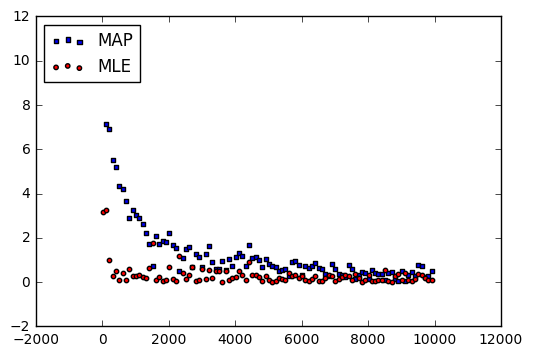

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(sample_sizes, error_MAP_array, s=10, c='b', marker="s", label='MAP')
ax1.scatter(sample_sizes,error_MLE_array, s=10, c='r', marker="o", label='MLE')
plt.legend(loc='upper left');
plt.show()

The main difference between the two series of errors is that the MAP series starts with a very high error because it takes into consideration a prior knowledge of the mean being distributed as N(0,1). As the sample's size gets bigger, the MAP estimator gets smaller and sometimes it gets smaller than the MLE estimator.

## Question 3 
(bonus)

Calculate the bias of the MLE for the mean and the variance of the normal distribution.

$$bias(mean) = E[\bar{x}] - \mu = 1/n\sum_{i=1}^n E[x]  - \mu = 1/n \times n \times \mu - \mu = 0$$
